## EE 461P: Data Science Principles  
### Homework 5
### Total points: 100 points 
### Due: 14th April, 11:59pm    

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TAs know.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s) and EID(s):
1. 
2. 

### Homework group No.: 

# Question 1: Bayesian Belief Networks [15 pts]



Refer to the Bayesian Network Belief [image](https://drive.google.com/file/d/1dn5nwLxzzPk-HRqlF-JJZvREf1fPZG__/view?usp=share_link) for this question. 

![picture](https://drive.google.com/uc?id=1dn5nwLxzzPk-HRqlF-JJZvREf1fPZG__)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Season = 1) = .001   
P(Atmospheric Pressure = 1) = .0.002


P(Rain = 1 | Season = 0, Atmospheric Pressure = 0) = .001  
P(Rain = 1 | Season = 0, Atmospheric Pressure = 1) = .29  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 0) = .94  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 1) = .95

P(Umbrella = 1 | Rain = 1) = .9  
P(Umbrella = 1 | Rain = 0) = .05

For the given Bayesian network, compute the following probabilities : 


1.1 Find the probability that  Umbrella = 0. (4 points)

1.2  Given that there is low Atmospheric Pressure (Atmospheric Pressure = 0), what is the probability that Rain = 1. (4 points)

1.3  Given that it rains(Rain = 1), what is the probability that the it is rainy season (Season = 1). (7 points)

1.1 : 
$$
P(Rain = 1) = (0.95)(0.001)(0.002) + (0.94)(0.001)(0.998) + (0.29)(0.999)(0.002) + (0.001)(0.999)(0.998) = 0.0025 \\
$$

$$
P(Umbrella = 0) = P(Umbrella = 0 | Rain = 1) * P(Rain = 1) + P(Umbrella = 0 | Rain = 0) * P(Rain = 0) \\
                = 0.1 * P(Rain = 1) + 0.95 * P(Rain = 0) \\
                = 0.1 * 0.0025 + 0.95 * 0.9975 \\
                = 0.9479 \\
$$

1.2 : TODO

1.3: TODO

## Q2. Logistic Regression (20 points)

2.1 Suppose you are trying to learn a logistic regression based classifier on a dataset $D = (x_i, y_i)^n$, i.e., you have n data samples in this dataset where each $x_i$ is a d-dimensional vector and $y_i \in \{-1,1\}$. Learning this classifier requires to find optimal $w$ and $b$ so that the probability of a data point $x$ belonging to class 1 is given by $\sigma(w^Tx+b)$ where $\sigma$ is the sigmoid function. Write the cost function as a function of $w$ and $b$ for this problem in a way that it tries to minimize the log loss function over the given dataset. You can learn more about the log loss [here](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training). (10 points)



2.2 Now consider a simpler problem with 2-dimensional data $x = [x_1, x_2]$. Given you have learnt optimal $w = [1,2]$ and $b = 0$. Draw the decision boundary for this classifier. Given this decision boundary, how do you classify a point $x=[1,1]$? (8+2=10 points)


Answer:

# Q3. Logistic Regression for Imbalanced Datasets (25 points)

Consider a binary imbalanced class problem given in the [`hw5_classification_dataset.csv`](https://drive.google.com/file/d/1KAEOYPfMVw2oIhMIPGTXAriBNhPawZtI/view?usp=share_link). Load the dataset into a pandas dataframe and print label distribution.

3.1 Data Pre-processing : Perform one-hot encoding of the features named `['InternetService','Contract','PaymentMethod']` to get the dummy features. (3 points)

3.2 Training : Train a logistic regression classifier after splitting the data in train/test datasets using 80/20 split and random_state = 15. Obtain and report the confusion matrix, accuracy and the AUC-ROC score of the classifier on the test data. What do you observe with respect to the performance of the model on different classes? (10 points)

3.3 Now, use class weights to modify the cost of wrong predictions for different classes differently by appropriately setting the `class_weight` parameter in the logistic regression classifier. Again print the confusion matrix, accuracy and the AUC-ROC score of the classifier on the test data. (7 points)

3.4 Mention an alternative method that could be used to address class imbalance in classification problems, briefly explaining how this method works and providing a reference (5 points)



## 3.1

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('hw5_classification_dataset.csv', index_col = [0])
df.reset_index(drop=True, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label
0,1,0,1,0,0.000000,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0.115423,0.001275,0
1,0,0,0,0,0.464789,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0.385075,0.215867,0
2,0,0,0,0,0.014085,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0.354229,0.010310,1
3,0,0,0,0,0.619718,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0
4,1,0,0,0,0.014085,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0.521891,0.015330,1


In [113]:
#One hot encoding for categorical columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
internet_onehot = encoder.fit_transform(df['InternetService'].values.reshape(-1,1)).toarray()
internet_onehot_df = pd.DataFrame(internet_onehot, columns = ['DSL', 'Fiber', 'No'])
print(internet_onehot_df.shape)

contract_onehot = encoder.fit_transform(df['Contract'].values.reshape(-1,1)).toarray()
contract_onehot_df = pd.DataFrame(contract_onehot, columns = ['Month', 'One', 'Two'])
print(contract_onehot_df.shape)

payment_onehot = encoder.fit_transform(df['PaymentMethod'].values.reshape(-1,1)).toarray()
payment_onehot_df = pd.DataFrame(payment_onehot, columns = ['Bank', 'Credit', 'Electronic', 'Mailed'])
print(payment_onehot_df.shape)

(7032, 3)
(7032, 3)
(7032, 4)


In [114]:
print(df.shape)

(7032, 20)


In [115]:
internet_onehot_df.reset_index(drop=True, inplace=True)
contract_onehot_df.reset_index(drop=True, inplace=True)
payment_onehot_df.reset_index(drop=True, inplace=True)

In [116]:
# Add internet_onehot to df as 3 columns and drop InternetService, without adding any nan values
df = pd.concat([df, internet_onehot_df], axis=1)
df = df.drop(['InternetService'], axis=1)

In [117]:
# do the same for contract and payment
df = pd.concat([df, contract_onehot_df], axis=1)
df = df.drop(['Contract'], axis=1)

In [118]:
df = pd.concat([df, payment_onehot_df], axis=1)
df = df.drop(['PaymentMethod'], axis=1)

In [120]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber,No,Month,One,Two,Bank,Credit,Electronic,Mailed
0,1,0,1,0,0.000000,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,0.014085,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0.619718,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3.2

In [121]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Label'], axis=1), df['Label'], test_size=0.2, random_state=15)


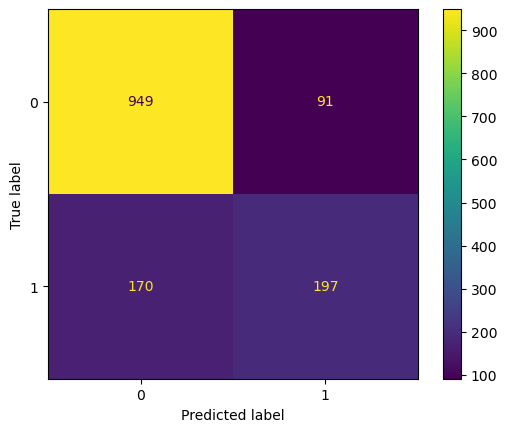

Accuracy:  0.814498933901919
ROC AUC:  0.724642370572207


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
# Answer here

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cmat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=model.classes_).plot()
plt.show()

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

In [124]:
df['Label'].value_counts()

0    5163
1    1869
Name: Label, dtype: int64

The model performs better on class 0 than class 1. This indicates that the model is biased towards class 0. This is likely because the dataset is imbalanced.

## 3.3

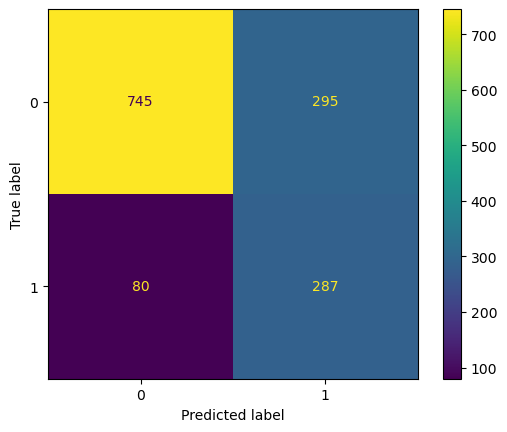

Accuracy:  0.7334754797441365
ROC AUC:  0.7491812513099979


In [125]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cmat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=model.classes_).plot()
plt.show()

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

While adjusting the class weight to be balanced does drop the accuracy, it does improve our ROC-AUC. This is because it stops misclassifying 1's to be 0's as much, but now it has started to do the opposite. However, it does do better on ROC-AUC slightly, which was the goal.

## 3.4

There are many ways to address class imbalance in classification problems. Two common methods are oversampling and undersampling. Oversampling means to create more samples of the minority class, while undersampling means to remove samples from the majority class. This can be done by either duplicating or removing samples. There are also more advanced methods such as SMOTE, which creates synthetic samples of the minority class to augment the data.

This works because it helps the model to learn the minority class better, and it helps prevent overfitting to the majority class. 
A reference can be found here: https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/

# Question 4 - Ensembles methods for classification (40 pts)

We will use the dataset from the kaggle competition [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit). We will work on a smaller version of this dataset. The dataset is available on canvas as ensemble-dataset.csv. 
We will predict the probability that somebody will experience financial distress in the next two years. The dataset has already been split into train and test sets for you.

In [141]:
import pandas as pd
data = pd.read_csv('ensemble-dataset.csv')
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents
0,0,1.062646,50,2,0.179032,3490,8,1,0,1,1
1,0,0.003591,83,0,0.000869,10352,14,0,0,0,0
2,0,1.000000,22,0,0.000000,100,1,0,0,0,0
3,0,0.000000,52,0,0.336355,7060,10,0,2,0,3
4,0,0.220152,54,0,0.235064,4083,15,0,0,0,1


In [142]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3382, 10) (3382,)
test (1667, 10) (1667,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), and [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html) Classifiers. When training each of these models, use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to perform a hyperparameter search using only the train data with `cv=3`, and report the best hyperparameters you have found. For each of the models below, report the [log_loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html), accuracy_score, roc_auc_score and the [calibration curve plot](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibrationDisplay.html#sklearn.calibration.CalibrationDisplay.from_estimator) using the best hyperparameters you have found. 

4.1 Use an MLP with random_state = 42. (7 points)

4.2 Use a Decision Tree Classifier with random_state = 42. (7 points)

4.3 Create an ensemble of 20 classifiers (i.e n_estimators = 20) with random_state = 42 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part 1. (7 points)

4.4 Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier with random_state=42. (7 points)

4.5 Use [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html) with random_state=42. (7 points)

4.6 Compare the performance of the decision tree and MLP with the ensemble methods based on the results you have obtained (all 4 metrics). (5 points)

In [143]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score, log_loss)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from time import time
%matplotlib inline

In [144]:
columns_list = list(X.columns)

In [145]:
class grid_search:
    # define your GridSearchCV object with the relevant parameters
    def __init__(self, model, params, model_name):
        self.model = model
        self.params = params
        self.model_name = model_name
        self.grid_search = GridSearchCV(model, params, cv=3, n_jobs=-1)

    def fit(self, X_train, Y_train):
        self.grid_search.fit(X_train, Y_train)
        print("Best parameters for {} are {}".format(self.model_name, self.grid_search.best_params_))
        return self.grid_search

    # use the fitted model with the best parameters to predict on the test set and report the metrics
    def predict(self, X_test, Y_test):
        y_pred = self.grid_search.predict(X_test)
        print("Accuracy score for {} is {}".format(self.model_name, accuracy_score(Y_test, y_pred)))
        print("ROC AUC score for {} is {}".format(self.model_name, roc_auc_score(Y_test, y_pred)))
        print("Log loss score for {} is {}".format(self.model_name, log_loss(Y_test, y_pred)))
        return y_pred

In [170]:
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt
def calibration_curve_plot(grid_search_ob, X_test, y_test):
    cdisp = CalibrationDisplay.from_estimator(grid_search_ob.grid_search.best_estimator_, X_test, y_test, n_bins=10)

Answer:

## 4.1

In [147]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp_params = {'hidden_layer_sizes': [(100,),(100,100),(100,100,100)],
                'activation': ['relu','tanh'],
                'solver': ['adam'],
                'alpha': [0.05],
                'learning_rate': ['constant','adaptive']
                }

mlp = grid_search(model = MLPClassifier(random_state=42),params = mlp_params, model_name = 'MLP')
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test, y_test)

/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLP are {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy score for MLP is 0.09658068386322735
ROC AUC score for MLP is 0.5083802532487588
Log loss score for MLP is 32.56253269586708


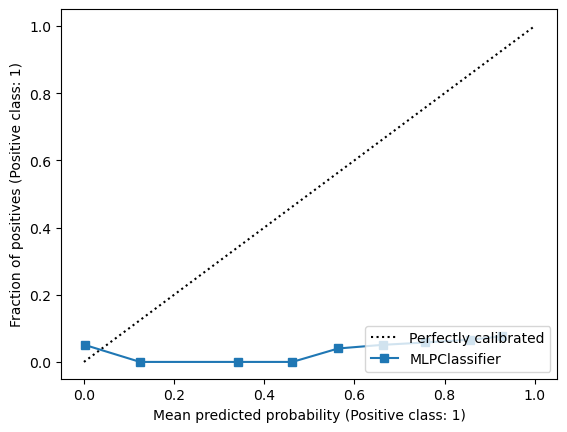

In [171]:
calibration_curve_plot(mlp, X_test, y_test)

## 4.2

In [148]:
decision_tree_params = {'criterion': ['gini', 'entropy'], 
                        'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                        'min_samples_split': [2, 5, 10, 15, 100],
                        'min_samples_leaf': [1, 2, 5, 10]
                        }

decision_tree = grid_search(model = DecisionTreeClassifier(random_state=42),params = decision_tree_params, model_name = 'Decision Tree')
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test, y_test)

Best parameters for Decision Tree are {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 100}
Accuracy score for Decision Tree is 0.9352129574085183
ROC AUC score for Decision Tree is 0.5646336683058941
Log loss score for Decision Tree is 2.3351617072733366


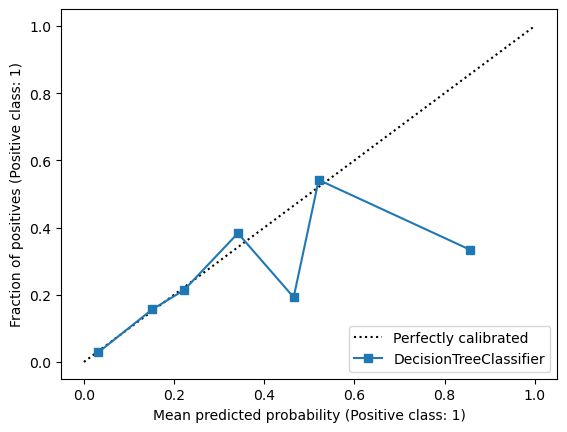

In [172]:
calibration_curve_plot(decision_tree, X_test, y_test)

## 4.3

In [151]:
bagging_ensemble_decision_tree_params = {   'n_estimators': [20],
                                            'max_samples': [0.5, 0.7, 1.0],
                                            'max_features': [0.5, 0.7, 1.0],
                                            'bootstrap': [True, False],
                                            'bootstrap_features': [True, False]

}

bagging_ensemble_decision_tree = grid_search(
    model = BaggingClassifier(
        base_estimator=DecisionTreeClassifier(random_state=42), 
        random_state=42),
    params = bagging_ensemble_decision_tree_params, 
    model_name = 'Bagging Ensemble Decision Tree'
)

bagging_ensemble_decision_tree.fit(X_train, y_train)
bagging_ensemble_decision_tree_pred = bagging_ensemble_decision_tree.predict(X_test, y_test)

/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

Best parameters for Bagging Ensemble Decision Tree are {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 20}
Accuracy score for Bagging Ensemble Decision Tree is 0.9370125974805039
ROC AUC score for Bagging Ensemble Decision Tree is 0.5311245337704608
Log loss score for Bagging Ensemble Decision Tree is 2.270296104293522


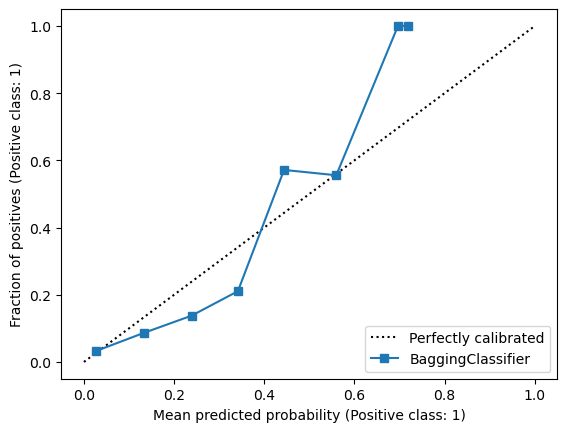

In [173]:
calibration_curve_plot(bagging_ensemble_decision_tree, X_test, y_test)

## 4.4

In [152]:
random_forest_params = {    'n_estimators': [20],
                            'criterion': ['gini', 'entropy'],
                            'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                            'min_samples_split': [2, 5, 10, 15, 100],
                            'min_samples_leaf': [1, 2, 5, 10],
                            'max_features': ['sqrt', 'log2', None]
}

random_forest = grid_search(model = RandomForestClassifier(random_state=42),params = random_forest_params, model_name = 'Random Forest')
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test, y_test)

/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

Best parameters for Random Forest are {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 20}
Accuracy score for Random Forest is 0.9370125974805039
ROC AUC score for Random Forest is 0.5483601786520323
Log loss score for Random Forest is 2.270296104293522


/home/sidharth/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


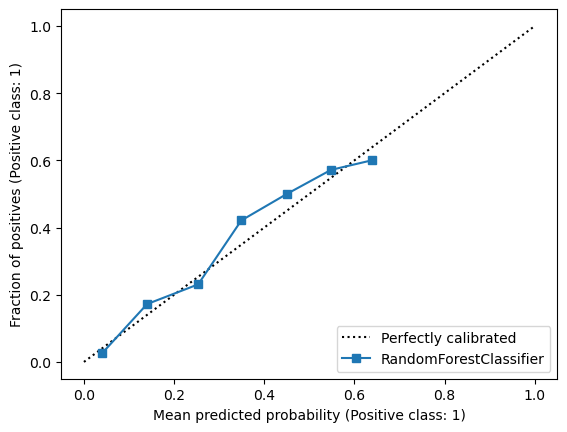

In [174]:
calibration_curve_plot(random_forest, X_test, y_test)

## 4.5

In [159]:
from xgboost import XGBClassifier
xgboost_params = {  'n_estimators': [20],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'max_depth': [3, 5, 7, 9, ],
                    'min_child_weight': [1, 3, 5],
                    'gamma': [0.1, 0.2 , 0.3],
                    'subsample': [0.6, 0.7, 0.8],
}

xgboost = grid_search(model = XGBClassifier(random_state=42),params = xgboost_params, model_name = 'XGBoost')
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test, y_test)

Best parameters for XGBoost are {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 20, 'subsample': 0.6}
Accuracy score for XGBoost is 0.9358128374325135
ROC AUC score for XGBoost is 0.5606454754947379
Log loss score for XGBoost is 2.3135398396133984


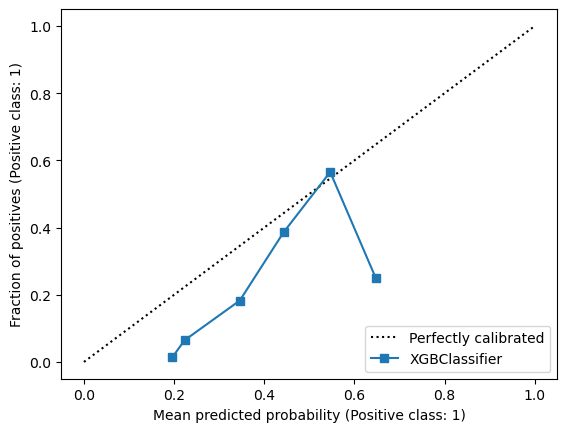

In [175]:
calibration_curve_plot(xgboost, X_test, y_test)